<a href="https://colab.research.google.com/github/KhurramRashid6893/NLP_Text-Feature-Engineering-Implementation/blob/main/NLP_Text_Feature_Engineering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Feature Engineering Implementation**

In [9]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger')
nltk.download("averaged_perceptron_tagger_eng")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [2]:
docs = [
    "I love natural language processing",
    "NLP is amazing and powerful",
    "I enjoy learning AI and machine learning"
]

df = pd.DataFrame({"Text": docs})
print(df)


                                       Text
0        I love natural language processing
1               NLP is amazing and powerful
2  I enjoy learning AI and machine learning


**Bag of WORDS**

In [3]:
# Initialize BoW vectorizer
bow = CountVectorizer()

# Fit and transform the data
bow_features = bow.fit_transform(df["Text"])

# Convert to DataFrame for better view
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow.get_feature_names_out())

print("🔹 Bag of Words Representation:")
print(bow_df)


🔹 Bag of Words Representation:
   ai  amazing  and  enjoy  is  language  learning  love  machine  natural  \
0   0        0    0      0   0         1         0     1        0        1   
1   0        1    1      0   1         0         0     0        0        0   
2   1        0    1      1   0         0         2     0        1        0   

   nlp  powerful  processing  
0    0         0           1  
1    1         1           0  
2    0         0           0  


**N-Gram Representation**

In [4]:
# Use bigrams (2-word combinations)
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))
ngram_features = ngram_vectorizer.fit_transform(df["Text"])

ngram_df = pd.DataFrame(ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

print("🔹 Bigram Representation:")
print(ngram_df)


🔹 Bigram Representation:
   ai and  amazing and  and machine  and powerful  enjoy learning  is amazing  \
0       0            0            0             0               0           0   
1       0            1            0             1               0           1   
2       1            0            1             0               1           0   

   language processing  learning ai  love natural  machine learning  \
0                    1            0             1                 0   
1                    0            0             0                 0   
2                    0            1             0                 1   

   natural language  nlp is  
0                 1       0  
1                 0       1  
2                 0       0  


**TF-IDF (Term Frequency–Inverse Document Frequency)**

In [5]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform
tfidf_features = tfidf.fit_transform(df["Text"])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())

print("🔹 TF-IDF Representation:")
print(tfidf_df.round(2))


🔹 TF-IDF Representation:
     ai  amazing   and  enjoy    is  language  learning  love  machine  \
0  0.00     0.00  0.00   0.00  0.00       0.5      0.00   0.5     0.00   
1  0.00     0.47  0.36   0.00  0.47       0.0      0.00   0.0     0.00   
2  0.36     0.00  0.28   0.36  0.00       0.0      0.73   0.0     0.36   

   natural   nlp  powerful  processing  
0      0.5  0.00      0.00         0.5  
1      0.0  0.47      0.47         0.0  
2      0.0  0.00      0.00         0.0  


**Part-of-Speech (POS) Tag Features**


Add linguistic structure as numerical info.

In [10]:
from nltk import word_tokenize, pos_tag

def extract_pos_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    nouns = len([t for t in pos_tags if t[1].startswith('N')])
    verbs = len([t for t in pos_tags if t[1].startswith('V')])
    adjectives = len([t for t in pos_tags if t[1].startswith('J')])
    return pd.Series([nouns, verbs, adjectives], index=["Nouns", "Verbs", "Adjectives"])

pos_df = df["Text"].apply(extract_pos_features)
print("🔹 POS Tag Features:")
print(pos_df)


🔹 POS Tag Features:
   Nouns  Verbs  Adjectives
0      2      1           1
1      1      1           2
2      3      2           0


Sparse vs Dense Representation

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ["I love NLP", "NLP is amazing"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print("Sparse Representation:")
print(X)
print("Shape:", X.shape)


Sparse Representation:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (2, 4)>
  Coords	Values
  (0, 2)	1
  (0, 3)	1
  (1, 3)	1
  (1, 1)	1
  (1, 0)	1
Shape: (2, 4)


In [12]:
#Convert Sparse → Dense
dense = X.toarray()
print(dense)


[[0 0 1 1]
 [1 1 0 1]]


Measuring Text Similarity

Once you have text as vectors, you can compare them mathematically
(e.g., how similar two sentences are).

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

docs = ["I love NLP", "NLP is amazing", "I enjoy deep learning"]
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(docs)

# Cosine similarity matrix
cosine_sim = cosine_similarity(X)
print("Cosine Similarity Matrix:")
print(cosine_sim.round(2))


Cosine Similarity Matrix:
[[1.   0.29 0.  ]
 [0.29 1.   0.  ]
 [0.   0.   1.  ]]


Visualizing Text Vectors

You can even plot your text features to understand clustering.

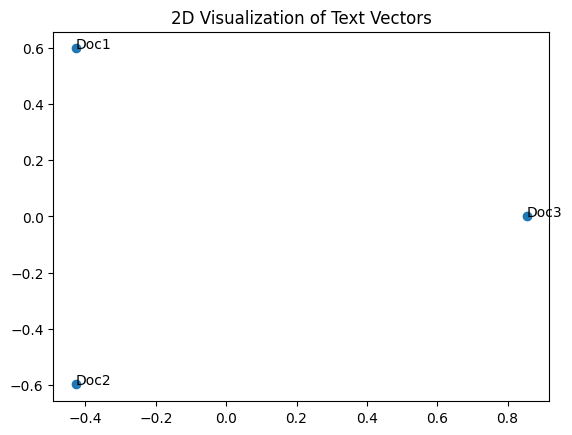

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_dense = X.toarray()
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_dense)

plt.scatter(reduced[:, 0], reduced[:, 1])
for i, text in enumerate(docs):
    plt.annotate(f"Doc{i+1}", (reduced[i, 0], reduced[i, 1]))
plt.title("2D Visualization of Text Vectors")
plt.show()


Combining Features

You can combine multiple feature types together

In [15]:
import numpy as np

combined_features = np.hstack((tfidf_features.toarray(), pos_df.values))
print("Final Combined Feature Shape:", combined_features.shape)


Final Combined Feature Shape: (3, 16)


# **What Are Word Embeddings?**

Word embeddings are dense vector representations of words that capture their meaning, context, and relationships.

Each word is represented as a fixed-length numerical vector (e.g., 100D or 300D).

Unlike BoW or TF-IDF, embeddings understand meaning —
similar words have similar vectors.

**Static Word Embeddings**

🔹 A. Word2Vec (Google)

 Concept:

Learns embeddings by predicting word neighbors (context) using neural networks.

Two architectures:

CBOW – predict word from context

Skip-gram – predict context from word



In [17]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 70.0 MB/s eta 0:00:00


In [18]:
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ["i", "love", "nlp"],
    ["nlp", "is", "amazing"],
    ["i", "enjoy", "learning", "machine", "learning"]
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

# View vector for a word
print("🔹 Vector for 'nlp':")
print(model.wv["nlp"])

# Find similar words
print("🔹 Most similar to 'learning':")
print(model.wv.most_similar("learning"))


🔹 Vector for 'nlp':
[-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724 -0.00892435
  0.009035   -0.01357392 -0.00709698  0.01879702 -0.00315531  0.00064274
 -0.00828126 -0.01536538 -0.00301602  0.00493959 -0.00177605  0.01106732
 -0.00548595  0.00452013  0.01091159  0.01669191 -0.00290748 -0.01841629
  0.0087411   0.00114357  0.01488382 -0.00162657 -0.00527683 -0.01750602
 -0.00171311  0.00565313  0.01080286  0.01410531 -0.01140624  0.00371764
  0.01217773 -0.0095961  -0.00621452  0.01359526  0.00326295  0.00037983
  0.00694727  0.00043555  0.01923765  0.01012121 -0.01783478 -0.01408312
  0.00180291  0.01278507]
🔹 Most similar to 'learning':
[('love', 0.13204392790794373), ('i', 0.1267007291316986), ('nlp', 0.042373016476631165), ('amazing', 0.012442179024219513), ('machine', -0.01447527389973402), ('is', -0.05974648892879486), ('enjoy', -0.11821284145116806)]


**GloVe (Global Vectors for Word Representation)**

 Concept:


Combines global co-occurrence statistics with local context.

Trained on large corpora (Wikipedia, Common Crawl).

Pre-trained GloVe embeddings:

glove.6B.100d.txt (100 dimensions, 6B tokens)

In [20]:
#Implementation (Pretrained Embeddings)
import numpy as np

# Load pretrained GloVe file (download from: https://nlp.stanford.edu/projects/glove/)
embeddings_index = {}
with open("/content/drive/MyDrive/Colab Notebooks/NLP/pretrained GloVe.2024.dolma.300d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Loaded %s word vectors." % len(embeddings_index))

# Example: Get vector for 'king'
print("Vector for 'king':")
print(embeddings_index["king"])


Loaded 1200001 word vectors.
Vector for 'king':
[ 6.603200e-02 -2.294820e-01 -3.092080e-01  4.549960e-01 -1.933340e-01
  2.746510e-01  1.203650e-01 -1.889070e-01  1.100442e+00 -4.446100e-02
 -1.360030e-01 -3.324510e-01  1.657720e-01  1.898240e-01  1.087910e-01
 -2.284600e-01  7.749300e-02 -1.664380e-01 -3.570940e-01  1.221390e-01
  2.770400e-01 -2.228850e-01 -7.497440e-01 -4.372610e-01 -3.963830e-01
 -4.035970e-01  2.090570e-01  8.307100e-02 -4.926000e-03 -4.306340e-01
  8.482200e-02 -1.756540e-01 -2.968540e-01  9.071300e-02  2.550830e-01
  1.958340e-01 -1.431590e-01  5.924200e-02 -1.708500e-02  1.498600e-02
 -5.592000e-03 -7.950700e-02 -4.498140e-01 -3.083240e-01  5.127140e-01
 -5.942900e-02  1.379540e-01 -3.557770e-01  9.933300e-02 -6.155600e-02
 -2.693070e-01  2.911750e-01  3.337060e-01 -4.296770e-01 -9.582300e-02
  1.487830e-01  3.276330e-01  7.061000e-03  8.776200e-02  1.902720e-01
 -2.068300e-01  1.352710e-01 -6.685140e-01 -1.922120e-01 -5.362600e-02
 -1.458160e-01  3.291390e-01 

**FastText (Facebook)**

 Concept:

Similar to Word2Vec but works at subword level.
→ Understands misspelled or rare words (e.g., “enviroment” ≈ “environment”).

In [21]:
from gensim.models.fasttext import FastText

model = FastText(sentences, vector_size=50, window=3, min_count=1)
print("Vector for 'environment':", model.wv["environment"])


Vector for 'environment': [-4.3731966e-04 -3.1014390e-03  2.1508157e-03  8.8138779e-04
  2.3435052e-03 -1.1000612e-03  7.9161000e-05  7.7587325e-04
 -7.7676865e-05  2.7582357e-03  7.7407359e-04 -1.3233055e-04
 -8.7501803e-06 -6.0289900e-04  1.6574118e-03 -2.5168490e-03
  1.1085202e-03 -2.2000785e-04 -3.7017610e-04  1.2507250e-03
 -3.2794260e-04 -1.0985747e-03 -4.8599922e-04 -1.8524112e-03
  3.3162415e-04 -4.0935557e-03 -1.4083165e-03  2.1750743e-03
  2.2642929e-03  4.7698631e-03  2.4935128e-03  1.7245478e-03
  1.8603469e-03  9.6400711e-04  5.7527685e-04  3.3782900e-03
  2.7572038e-03  9.9374179e-04  3.1301056e-04 -3.2918253e-03
  1.8923722e-04 -1.0976851e-03  2.6267176e-04 -8.2442595e-04
 -4.6971298e-04  1.2186750e-04  1.4667441e-03 -6.0249824e-04
  2.7108062e-03 -9.2392776e-04]


# **Contextual Word Embeddings**
🔹 A. BERT (Bidirectional Encoder Representations from Transformers)

Unlike Word2Vec, BERT generates context-dependent embeddings —
the vector for a word changes depending on its sentence.

In [22]:
from transformers import BertTokenizer, BertModel
import torch

# Load pretrained BERT model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Input text
text = "I love learning NLP"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# Get embeddings for each token
embeddings = outputs.last_hidden_state
print("Embeddings shape:", embeddings.shape)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Embeddings shape: torch.Size([1, 7, 768])
